**Load Dataset From Google Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#extract the data
import zipfile,os
local_zip = '/gdrive/MyDrive/Bangkit Capstone/ML/Non and biodegradable dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


**Check Number for Each Classes**

In [3]:
# Check the number of images for each class and set
print(f"There are {len(os.listdir('/content/Non and biodegradable dataset/TRAIN/B'))} images of Biodegradable for training.\n")
print(f"There are {len(os.listdir('/content/Non and biodegradable dataset/TRAIN/N'))} images of Nonbiodegradable for training.\n")
print(f"There are {len(os.listdir('/content/Non and biodegradable dataset/TEST/B'))} images of Biodegradable for testing.\n")
print(f"There are {len(os.listdir('/content/Non and biodegradable dataset/TEST/N'))} images of Nonbiodegradable for testing.\n")

There are 119845 images of Biodegradable for training.

There are 119845 images of Nonbiodegradable for training.

There are 8363 images of Biodegradable for testing.

There are 8363 images of Nonbiodegradable for testing.



**Check Shape for each Image**

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random
import cv2

In [5]:
# Load the example
classes = os.listdir('/content/Non and biodegradable dataset/TRAIN')
i = random.randint(0,1)
images = os.listdir('/content/Non and biodegradable dataset/TRAIN'+'/'+classes[i])
j = random.randint(0,300)
image = cv2.imread('/content/Non and biodegradable dataset/TRAIN'+'/'+classes[i]+'/'+images[j])
sample_image  = load_img('/content/Non and biodegradable dataset/TRAIN'+'/'+classes[i]+'/'+images[j])

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (200, 200, 3)


**Load Images**

In [6]:
import os
import matplotlib.pyplot as plt

In [7]:
classes = os.listdir('/content/Non and biodegradable dataset/TRAIN')

plt.figure(figsize=(30, 30))
for x in range(10) :
  i = random.randint(0,1)
  images = os.listdir('/content/Non and biodegradable dataset/TRAIN'+'/'+classes[i])
  j = random.randint(0,119844)
  image = cv2.imread('/content/Non and biodegradable dataset/TRAIN'+'/'+classes[i]+'/'+images[j])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ax = plt.subplot(5, 5, x + 1 )
  plt.imshow(image)
  plt.title(classes[i])
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.


**Preprocessing Data Set**

In [8]:
#Import Libraries

import numpy as np #Numerical Computing.
import os #I/O.
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory #Dataset Generator.

In [9]:
#Set Up Variables

main_dir='/content/Non and biodegradable dataset/' #Root Directory of Input.
train_dir = os.path.join(main_dir, 'TRAIN') #Training Subset Directories.
test_dir = os.path.join(main_dir, 'TEST') #Evaluation Subset Directory.
classes = ['B','N'] #Binary Class Used for Dataset Generator. Leave It as is.

im_size = (192, 192) #Output Image Size for Dataset Generator.
batch_size = 32 #Batch Size Used in Dataset Generator.
seed = np.random.randint(123456789) #Seed for Shuffling in Dataset Generator.
val_split = 0.3 #Fraction for Validation Subset (0.3 = 30% of Training Subset).

In [10]:
#Set Up Dataset

train_dataset = None #Training Dataset. Leave It as is.
validation_dataset = None #Validation Dataset. Leave It as is.

#Convert Image from Directory to tf.data.Dataset() Object.
train_dataset = image_dataset_from_directory(
    directory=train_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    seed=seed,
    validation_split=val_split,
    shuffle=True,
    subset='training' #Subset Indicator. Use Data Readed as Training Subset.
)

#Convert Image from Directory to tf.data.Dataset() Object.
validation_dataset = image_dataset_from_directory(
    directory=train_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    seed=seed,
    validation_split=val_split,
    shuffle=True,
    subset='validation' #Subset Indicator. Use Data Readed as Validation Subset.
)

#Convert Image from Directory to tf.data.Dataset() Object.
test_dataset = image_dataset_from_directory(
    directory=test_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    shuffle=True

)


Found 239690 files belonging to 2 classes.
Using 167783 files for training.
Found 239690 files belonging to 2 classes.
Using 71907 files for validation.
Found 16726 files belonging to 2 classes.


In [11]:
#Data augmentation and preprocessing

data_augmentation = tf.keras.Sequential([
  # A preprocessing layer which randomly flips images during training.
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  # A preprocessing layer which randomly rotates images during training.
  tf.keras.layers.RandomRotation(0.2),
])

In [12]:
#Rescale pixel values

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

**Configure the dataset for performance**

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

**Transfer Learning from MobileNetV2**

In [14]:
# Create the base model from the pre-trained model MobileNet V2

IMG_SHAPE = im_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)





9406464/9406464 [==============================] - 0s 0us/step
(32, 6, 6, 1280)


**Feature Extraction**

In [15]:
# Freeze base model

'''
When you use base model as feature extraction layer,
it is important to freeze the convolutional base before you
compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training.
'''

base_model.trainable = False

**Base Model Architecture**

In [16]:
base_model.summary()


Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

**Setup model architecture**

In [17]:
#Add a classification head

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
# (32, 5, 5, 1280) -> (32, 1280)
print(feature_batch_average.shape)

(32, 1280)


In [18]:
# Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image.
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [19]:
# Chain the layers
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
prediction_layer = tf.keras.layers.Dense(1)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [20]:
#Compile the model

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 192, 192, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 192, 192, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

**Training**

In [22]:
#creating callback
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\n\nReached 99% accuracy so cancelling training!\n\n")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [23]:
# Instantiate the callback class
callbacks = myCallback()

In [24]:

#Train the model

initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    verbose=1,
                    validation_data=validation_dataset,
                    callbacks=[callbacks])

Epoch 1/10
5244/5244 [==============================] - 317s 59ms/step - loss: 0.1591 - accuracy: 0.9354 - val_loss: 0.1009 - val_accuracy: 0.9632
Epoch 2/10
5244/5244 [==============================] - 316s 60ms/step - loss: 0.1142 - accuracy: 0.9577 - val_loss: 0.0947 - val_accuracy: 0.9653
Epoch 3/10
5244/5244 [==============================] - 279s 53ms/step - loss: 0.1091 - accuracy: 0.9597 - val_loss: 0.0913 - val_accuracy: 0.9677
Epoch 4/10
5244/5244 [==============================] - 280s 53ms/step - loss: 0.1068 - accuracy: 0.9609 - val_loss: 0.0893 - val_accuracy: 0.9681
Epoch 5/10
5244/5244 [==============================] - 280s 53ms/step - loss: 0.1045 - accuracy: 0.9613 - val_loss: 0.0886 - val_accuracy: 0.9684
Epoch 6/10
5244/5244 [==============================] - 282s 54ms/step - loss: 0.1030 - accuracy: 0.9618 - val_loss: 0.0878 - val_accuracy: 0.9684
Epoch 7/10
5244/5244 [==============================] - 290s 55ms/step - loss: 0.1030 - accuracy: 0.9619 - val_loss: 0

**Learning curves**

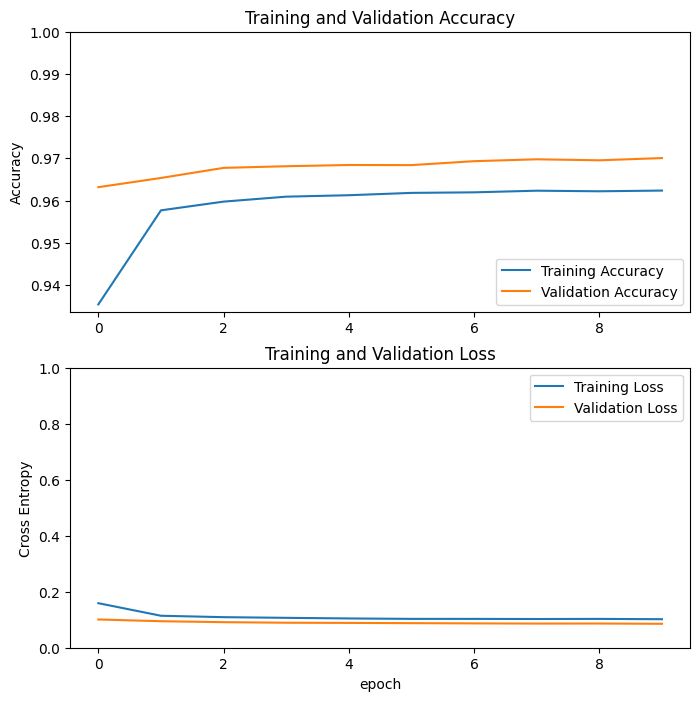

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Fine tuning**

In [26]:
base_model.trainable = True


In [27]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [28]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 192, 192, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 192, 192, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [30]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
5244/5244 [==============================] - 376s 69ms/step - loss: 0.0881 - accuracy: 0.9678 - val_loss: 0.0805 - val_accuracy: 0.9758
Epoch 11/20
5244/5244 [==============================] - 361s 69ms/step - loss: 0.0709 - accuracy: 0.9745 - val_loss: 0.0590 - val_accuracy: 0.9774
Epoch 12/20
5244/5244 [==============================] - 364s 69ms/step - loss: 0.0647 - accuracy: 0.9772 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 13/20
5244/5244 [==============================] - 364s 69ms/step - loss: 0.0618 - accuracy: 0.9787 - val_loss: 0.0661 - val_accuracy: 0.9808
Epoch 14/20
5244/5244 [==============================] - 363s 69ms/step - loss: 0.0601 - accuracy: 0.9796 - val_loss: 0.0543 - val_accuracy: 0.9822
Epoch 15/20
5244/5244 [==============================] - 368s 70ms/step - loss: 0.0580 - accuracy: 0.9803 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 16/20
5244/5244 [==============================] - 366s 70ms/step - loss: 0.0561 - accuracy: 0.9809 - val_

**Feature Extraction vs Fine Tuning**

In [31]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

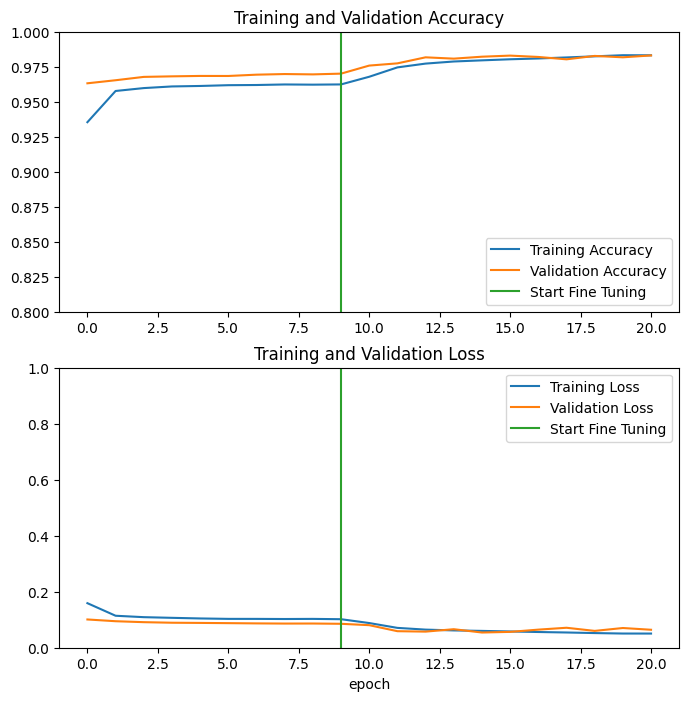

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Evaluation**

In [33]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

523/523 [==============================] - 23s 43ms/step - loss: 0.1706 - accuracy: 0.9580
Test accuracy : 0.957969605922699


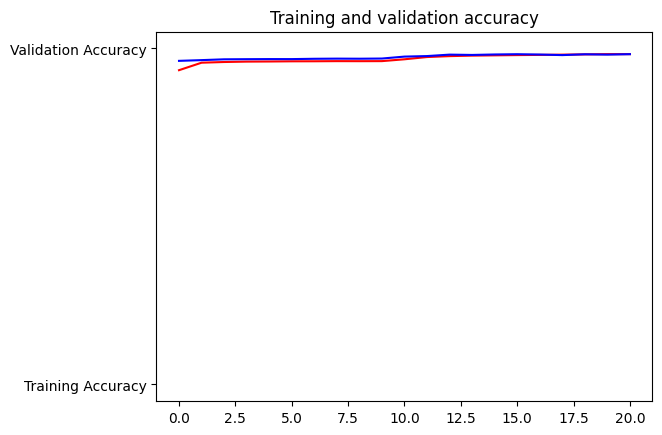

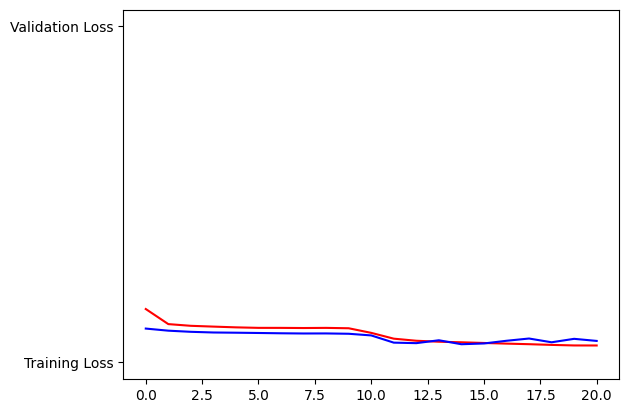

In [51]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

**Predicting On A Batch of Test Images**

In [95]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

In [96]:
predictions = model.predict_on_batch(image_batch).flatten()
predictions

array([ 17.15709   ,   1.3636919 ,   0.39259157,  -3.5649636 ,
        15.703983  ,   3.5792468 ,  13.994415  , -17.237885  ,
        -5.4210157 , -28.098604  ,  11.682198  ,   7.790815  ,
         6.736284  ,  10.919312  , -14.601211  , -13.512479  ,
        -7.4144006 ,   2.7614508 ,  -7.6521583 , -11.431573  ,
        -3.2338917 ,  13.642056  ,   9.450752  ,   7.0102754 ,
        10.897545  ,   3.883693  ,   4.6912484 , -33.412582  ,
       -16.835592  , -27.238806  ,   9.715102  , -12.986412  ],
      dtype=float32)

In [97]:
# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.0000000e+00, 7.9635912e-01, 5.9690642e-01, 2.7519276e-02,
       9.9999988e-01, 9.7286034e-01, 9.9999917e-01, 3.2634865e-08,
       4.4031786e-03, 6.2651468e-13, 9.9999154e-01, 9.9958664e-01,
       9.9881434e-01, 9.9998188e-01, 4.5580029e-07, 1.3539556e-06,
       6.0215063e-04, 9.4055682e-01, 4.7479229e-04, 1.0847415e-05,
       3.7910052e-02, 9.9999881e-01, 9.9992132e-01, 9.9909830e-01,
       9.9998152e-01, 9.7984010e-01, 9.9090827e-01, 3.0838968e-15,
       4.8797226e-08, 1.4802563e-12, 9.9993968e-01, 2.2912470e-06],
      dtype=float32)>

In [98]:
#make predictions either 0 or 1
predictions = tf.where(predictions < 0.5, 0, 1)
predictions

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int32)>

In [99]:
print('Predictions:\n', predictions.numpy().flatten())
print("\nvs\n")
print('Labels:\n', label_batch.flatten() )


Predictions:
 [1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0]

vs

Labels:
 [1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0.]


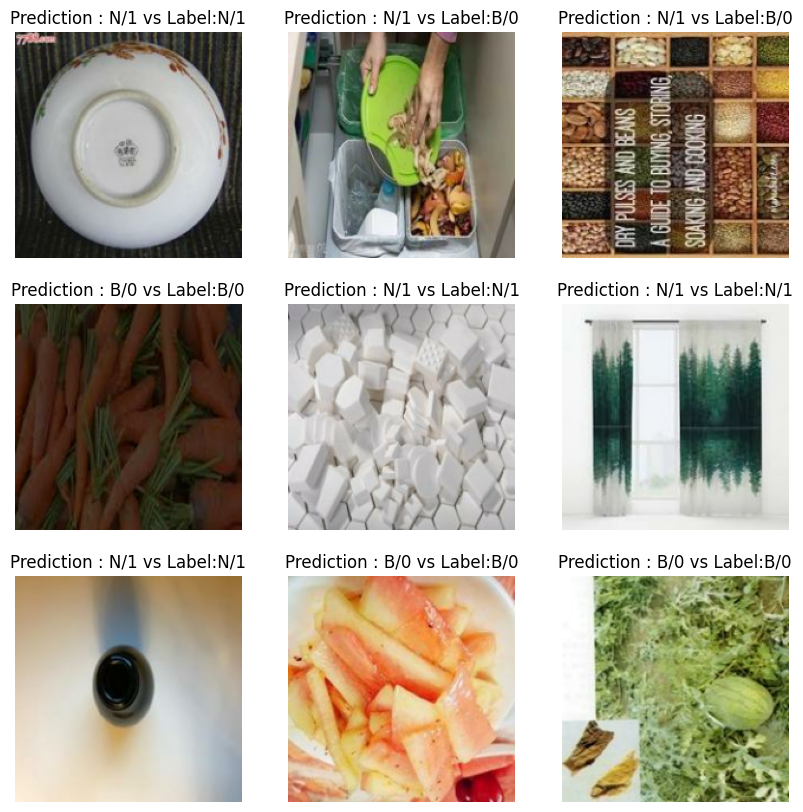

In [100]:
class_names = ['B','N']
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f"Prediction : {class_names[predictions[i]]}/{predictions.numpy()[i]} vs Label:{class_names[int(label_batch.flatten()[i])]}/{int(label_batch.flatten()[i])}")
  plt.axis("off")

**Confusion Matrix**

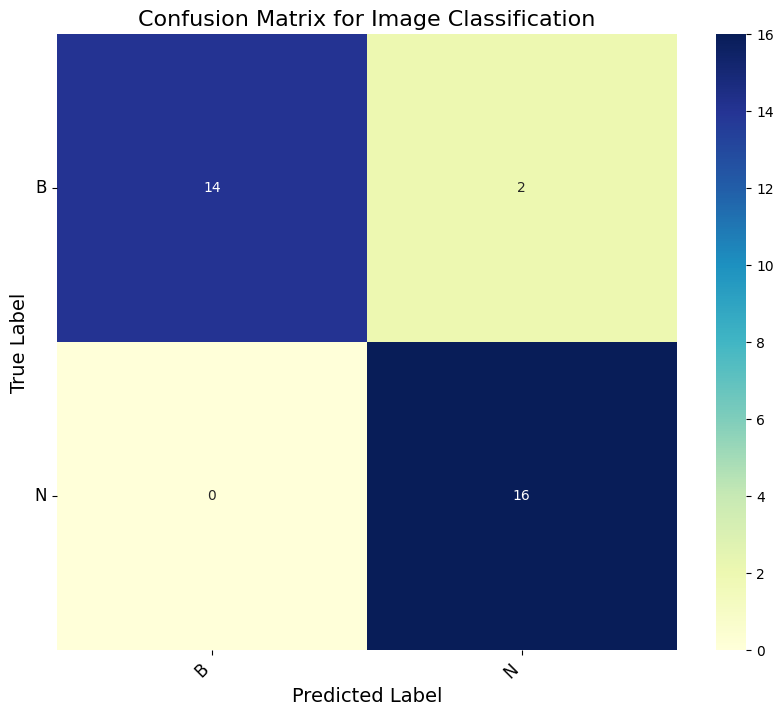

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = label_batch.flatten() # True labels of the images
y_pred = predictions.numpy().flatten()   # Predicted labels by the model

# Get the class labels
classes = ['B', 'N',]  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap='YlGnBu')

# Customizations
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Image Classification', fontsize=16)

plt.show()

**Saving Training History**

In [58]:
import pickle

In [59]:
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

**Save Model Using TF Saved Model**

In [60]:
from datetime import datetime
from pytz import timezone
import shutil
tf_saved_model_path = f"/gdrive/MyDrive/Bangkit Capstone/ML/models/{datetime.now(timezone('Asia/Jakarta')).strftime('%Y%m%d-%H%M%S')}-MFZ-TFSavedModel/1"
tf.saved_model.save(model, tf_saved_model_path)
shutil.copy("/trainHistoryDict",tf_saved_model_path)


'/gdrive/MyDrive/Bangkit Capstone/ML/models/20230613-111139-MFZ-TFSavedModel/1/trainHistoryDict'

**Save Model Using Keras Saved Model**

In [61]:
from datetime import datetime
from pytz import timezone
import shutil
keras_saved_model_path = f"/gdrive/MyDrive/Bangkit Capstone/ML/models/{datetime.now(timezone('Asia/Jakarta')).strftime('%Y%m%d-%H%M%S')}-MFZ-KerasSavedModel"
model.save(keras_saved_model_path)
shutil.copy("/trainHistoryDict",keras_saved_model_path)

'/gdrive/MyDrive/Bangkit Capstone/ML/models/20230613-111207-MFZ-KerasSavedModel/trainHistoryDict'

**Save Model Using Keras HDF5**

In [62]:
from datetime import datetime
from pytz import timezone
import shutil
h5_model_path = f"/gdrive/MyDrive/Bangkit Capstone/ML/models/{datetime.now(timezone('Asia/Jakarta')).strftime('%Y%m%d-%H%M%S')}-MFZ-H5"
model.save(f"{h5_model_path}/model.h5")
shutil.copy("/trainHistoryDict",h5_model_path)

shutil.copy("/trainHistoryDict",h5_model_path)

'/gdrive/MyDrive/Bangkit Capstone/ML/models/20230613-111235-MFZ-H5/trainHistoryDict'